## Plotting composites ##

Plotting composites for two types of very bad winter days across three datasets: ERA5, DePreSys (10 members, Nov. init, first DJF), and CANARI (40 members, DJF).

1. Worst wind cold temp events - for each winter, this is where I've selected the day with the lowest wind speed and taken the corresponding temperature on that 'worst wind' day. I have then plotted these as a scatter and identified the very bad days, which are in both the 0th-50th percentile of the wind speeds for worst wind days and 0th-50th percentile of temperature for the worst temp days. These very bad days are what I am plotting as composites here.

2. Worst temp low wind events, same as above, but for the lowest temperature and then taking the corresponding wind speed.

In [3]:
import os
import sys
import glob

import iris
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

In [4]:
# Set up the file to the
worst_temp_path = "/home/users/benhutch/unseen_multi_year/dfs/obs_worst_temp_low_wind_djf.csv"
worst_wind_path = "/home/users/benhutch/unseen_multi_year/dfs/obs_worst_wind_cold_temp_djf.csv"

# load these datarames
worst_temp = pd.read_csv(worst_temp_path)
worst_wind = pd.read_csv(worst_wind_path)

In [6]:
# extract the worst temp dates
worst_temp_dates = worst_temp["time_worst_tas_date"].values
worst_temp_dates = pd.to_datetime(worst_temp_dates)

# extract the worst wind dates
worst_wind_dates = worst_wind["time_worst_wind_date"].values
worst_wind_dates = pd.to_datetime(worst_wind_dates)

# print these
print(worst_temp_dates)
print(worst_wind_dates)

DatetimeIndex(['1977-01-12', '2008-12-31'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1977-01-12', '1981-12-10'], dtype='datetime64[ns]', freq=None)


In [7]:
# Set up the path to the data
data_path = "/gws/nopw/j04/canari/users/benhutch/ERA5/ERA5_msl_daily_1960_2020_daymean.nc"

# Load the data
psl_cube = iris.load_cube(data_path, "msl")

In [12]:
psl_cube["time"].data

array([ 525947,  525971,  525995, ..., 1060619, 1060643, 1060667],
      dtype=int32)

In [18]:
import cftime
import iris

# Assuming psl_cube is already defined and loaded

# Extract the time coordinate points
time_points = psl_cube.coord("time").points

# Extract the time units and calendar from the time coordinate
time_units = psl_cube.coord("time").units
calendar = psl_cube.coord("time").units.calendar

# Convert the numeric time values to datetime objects
datetime_values = cftime.num2date(time_points, units=time_units.origin, calendar=calendar)

# Print the datetime values to verify
print(datetime_values)

[cftime.DatetimeGregorian(1960, 1, 1, 11, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1960, 1, 2, 11, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1960, 1, 3, 11, 0, 0, 0, has_year_zero=False)
 ...
 cftime.DatetimeGregorian(2020, 12, 29, 11, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2020, 12, 30, 11, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2020, 12, 31, 11, 0, 0, 0, has_year_zero=False)]


In [21]:
# convert the datetime values to cf time.datetime objects
worst_temp_dates = [cftime.datetime(d.year, d.month, d.day) for d in worst_temp_dates]

In [26]:
# make sure the calendar is the same
print(worst_temp_dates[0].calendar)
print(datetime_values[0].calendar)

standard
standard


In [31]:
# strip the time from the datetime values
worst_temp_dates = [cftime.datetime(d.year, d.month, d.day) for d in worst_temp_dates]

# strip the time from the datetime values in worst temp dates
worst_wind_dates = [cftime.datetime(d.year, d.month, d.day) for d in worst_wind_dates]

# dp the same for the datetime values
datetime_values = [cftime.datetime(d.year, d.month, d.day) for d in datetime_values]

In [37]:
import numpy as np

# find the dates of the worst temp and wind
# Set up an empty cube
worst_temp_cube = iris.cube.CubeList([])

# loop through the dates
for date in worst_temp_dates:
    # print the date and the type
    print(date, type(date))

    # # print the value and type of the first date point
    # print(datetime_values[0], type(datetime_values[0]))

    # find the index of the date in the datetime values
    index = np.where(np.array(datetime_values) == date)[0][0]

    # print the index
    print(index)

    # print the value of the index
    print(datetime_values[index])

    # extract the cube at the index
    cube_this = psl_cube[index]

    # append this cube to the list
    worst_temp_cube.append(cube_this)

1977-01-12 00:00:00 <class 'cftime._cftime.datetime'>
6221
1977-01-12 00:00:00
2008-12-31 00:00:00 <class 'cftime._cftime.datetime'>
17897
2008-12-31 00:00:00


In [65]:
# form the worst wind cube
worst_wind_cube = iris.cube.CubeList([])

# loop through the dates
for date in worst_wind_dates:
    # print the date and the type
    print(date, type(date))

    # # print the value and type of the first date point
    # print(datetime_values[0], type(datetime_values[0]))

    # find the index of the date in the datetime values
    index = np.where(np.array(datetime_values) == date)[0][0]

    # print the index
    print(index)

    # print the value of the index
    print(datetime_values[index])

    # extract the cube at the index
    cube_this = psl_cube[index]

    # append this cube to the list
    worst_wind_cube.append(cube_this)

1977-01-12 00:00:00 <class 'cftime._cftime.datetime'>
6221
1977-01-12 00:00:00
1981-12-10 00:00:00 <class 'cftime._cftime.datetime'>
8014
1981-12-10 00:00:00


In [38]:
worst_temp_cube = worst_temp_cube.merge_cube()

In [66]:
# merge the worst wind cube
worst_wind_cube = worst_wind_cube.merge_cube()

In [39]:
worst_temp_cube

<iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (time: 2; latitude: 214; longitude: 304)>

In [45]:
psl_cube

<iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (time: 22281; latitude: 214; longitude: 304)>

In [47]:
psl_djf

In [48]:
# process the climatology for 1990-2020 DJF
# extract the DJF data
psl_djf = psl_cube.extract(iris.Constraint(time=lambda cell: cell.point.month in [12, 1, 2]))

# extract the 1990-2020 data
psl_djf_1990_2020 = psl_djf.extract(iris.Constraint(time=lambda cell: 1990 <= cell.point.year <= 2020))

In [49]:
psl_djf_1990_2020

<iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (time: 2798; latitude: 214; longitude: 304)>

In [50]:
# take the mean over the time dimension
psl_djf_1990_2020_mean = psl_djf_1990_2020.collapsed("time", iris.analysis.MEAN)

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/coords.py:2182: IrisVagueMetadataWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(


In [51]:
worst_temp_cube_anoms = worst_temp_cube - psl_djf_1990_2020_mean

In [67]:
worst_wind_cube_anoms = worst_wind_cube - psl_djf_1990_2020_mean

In [52]:
worst_temp_cube_anoms_array = worst_temp_cube_anoms.data

In [68]:
worst_wind_cube_anoms_array = worst_wind_cube_anoms.data

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)


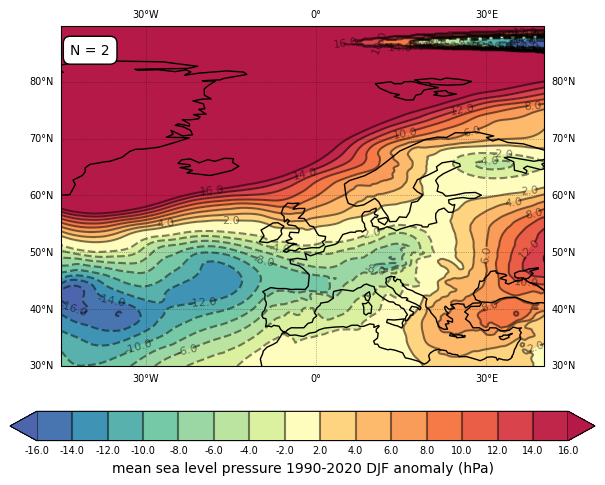

In [63]:
from matplotlib import colors
import matplotlib.ticker as mplticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotting_functions import format_func_one_decimal
from matplotlib.ticker import FuncFormatter

# take the mean over time of the worst temp cube
# worst_temp_cube = worst_temp_cube.collapsed("time", iris.analysis.MEAN)

# plot for europe
plt.figure(figsize=(12, 5))

ax = plt.axes(projection=ccrs.PlateCarree())

# clevs = np.linspace(-8, 8, 18)
clevs = np.array(
    [
        -16.0,
        -14.0,
        -12.0,
        -10.0,
        -8.0,
        -6.0,
        -4.0,
        -2.0,
        2.0,
        4.0,
        6.0,
        8.0,
        10.0,
        12.0,
        14.0,
        16.0,
    ]
)
ticks = clevs


# ensure that these are floats
clevs = clevs.astype(float)
ticks = ticks.astype(float)

# custom colormap
cs = [
    "#4D65AD",
    "#3E97B7",
    "#6BC4A6",
    "#A4DBA4",
    "#D8F09C",
    "#FFFEBE",
    "#FFD27F",
    "#FCA85F",
    "#F57244",
    "#DD484C",
    "#B51948",
]
# cs = ["#313695", "#4575b4", "#74add1", "#abd9e9", "#e0f3f8", "#ffffbf", "#fee090", "#fdae61", "#f46d43", "#d73027", "#a50026"]
cmap = colors.LinearSegmentedColormap.from_list("custom_cmap", cs)

lons = worst_temp_cube.coord("longitude").points
lats = worst_temp_cube.coord("latitude").points
field = worst_temp_cube_anoms_array

# plot the data
mymap = ax.contourf(
    lons, lats, field / 100, clevs, transform=ccrs.PlateCarree(), cmap=cmap, extend="both"
)
contours = ax.contour(
    lons,
    lats,
    field / 100,
    clevs,
    colors="black",
    transform=ccrs.PlateCarree(),
    linewidth=0.2,
    alpha=0.5,
)

ax.clabel(
    contours, clevs, fmt="%.1f", fontsize=8, inline=True, inline_spacing=0.0
)

ax.coastlines()

# format the gridlines and labels
gl = ax.gridlines(
    draw_labels=True, linewidth=0.5, color="black", alpha=0.5, linestyle=":"
)
gl.xlabels_top = False
gl.xlocator = mplticker.FixedLocator(np.arange(-180, 180, 30))
gl.xformatter = LONGITUDE_FORMATTER
gl.xlabel_style = {"size": 7, "color": "black"}
gl.ylabels_right = False
gl.yformatter = LATITUDE_FORMATTER
gl.ylabel_style = {"size": 7, "color": "black"}

# set up the num events
num_events = len(worst_temp_dates)

# include a textbox in the top left
ax.text(
    0.02,
    0.95,
    f"N = {num_events}",
    verticalalignment="top",
    horizontalalignment="left",
    transform=ax.transAxes,
    color="black",
    fontsize=10,
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"),
)
# # constrain to europe
# ax.set_extent([-20, 40, 35, 70])

cbar = plt.colorbar(
    mymap,
    orientation="horizontal",
    shrink=0.5,
    pad=0.1,
    format=FuncFormatter(format_func_one_decimal),
)
# add colorbar label
cbar.set_label(
    f"mean sea level pressure 1990-2020 DJF anomaly (hPa)",
    rotation=0,
    fontsize=10,
)

# add contour lines to the colorbar
cbar.add_lines(contours)

cbar.ax.tick_params(labelsize=7, length=0)
# set the ticks
cbar.set_ticks(ticks)

# set a tight layout
plt.tight_layout()

In [70]:
# take the time mean of the worst wind cube
worst_wind_cube_anoms_array_time_mean = np.mean(worst_wind_cube_anoms_array, axis=0)

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)


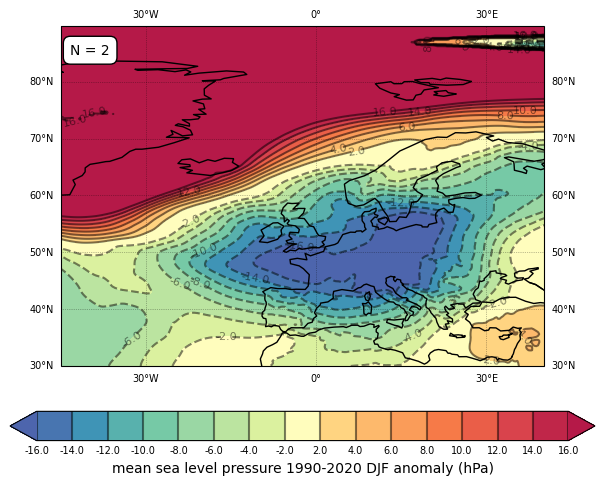

In [71]:
# plot for europe
plt.figure(figsize=(12, 5))

ax = plt.axes(projection=ccrs.PlateCarree())

# clevs = np.linspace(-8, 8, 18)
clevs = np.array(
    [
        -16.0,
        -14.0,
        -12.0,
        -10.0,
        -8.0,
        -6.0,
        -4.0,
        -2.0,
        2.0,
        4.0,
        6.0,
        8.0,
        10.0,
        12.0,
        14.0,
        16.0,
    ]
)
ticks = clevs


# ensure that these are floats
clevs = clevs.astype(float)
ticks = ticks.astype(float)

# custom colormap
cs = [
    "#4D65AD",
    "#3E97B7",
    "#6BC4A6",
    "#A4DBA4",
    "#D8F09C",
    "#FFFEBE",
    "#FFD27F",
    "#FCA85F",
    "#F57244",
    "#DD484C",
    "#B51948",
]
# cs = ["#313695", "#4575b4", "#74add1", "#abd9e9", "#e0f3f8", "#ffffbf", "#fee090", "#fdae61", "#f46d43", "#d73027", "#a50026"]
cmap = colors.LinearSegmentedColormap.from_list("custom_cmap", cs)

lons = worst_temp_cube.coord("longitude").points
lats = worst_temp_cube.coord("latitude").points
field = worst_wind_cube_anoms_array_time_mean

# plot the data
mymap = ax.contourf(
    lons, lats, field / 100, clevs, transform=ccrs.PlateCarree(), cmap=cmap, extend="both"
)
contours = ax.contour(
    lons,
    lats,
    field / 100,
    clevs,
    colors="black",
    transform=ccrs.PlateCarree(),
    linewidth=0.2,
    alpha=0.5,
)

ax.clabel(
    contours, clevs, fmt="%.1f", fontsize=8, inline=True, inline_spacing=0.0
)

ax.coastlines()

# format the gridlines and labels
gl = ax.gridlines(
    draw_labels=True, linewidth=0.5, color="black", alpha=0.5, linestyle=":"
)
gl.xlabels_top = False
gl.xlocator = mplticker.FixedLocator(np.arange(-180, 180, 30))
gl.xformatter = LONGITUDE_FORMATTER
gl.xlabel_style = {"size": 7, "color": "black"}
gl.ylabels_right = False
gl.yformatter = LATITUDE_FORMATTER
gl.ylabel_style = {"size": 7, "color": "black"}

# set up the num events
num_events = len(worst_temp_dates)

# include a textbox in the top left
ax.text(
    0.02,
    0.95,
    f"N = {num_events}",
    verticalalignment="top",
    horizontalalignment="left",
    transform=ax.transAxes,
    color="black",
    fontsize=10,
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"),
)
# # constrain to europe
# ax.set_extent([-20, 40, 35, 70])

cbar = plt.colorbar(
    mymap,
    orientation="horizontal",
    shrink=0.5,
    pad=0.1,
    format=FuncFormatter(format_func_one_decimal),
)
# add colorbar label
cbar.set_label(
    f"mean sea level pressure 1990-2020 DJF anomaly (hPa)",
    rotation=0,
    fontsize=10,
)

# add contour lines to the colorbar
cbar.add_lines(contours)

cbar.ax.tick_params(labelsize=7, length=0)
# set the ticks
cbar.set_ticks(ticks)

# set a tight layout
plt.tight_layout()